In [ ]:
def ec(psi, mu, a, e, k):

    R = np.sqrt((mu*a**3)/k)
    P = 1-e*np.cos(psi)

    return 1/(R*P)

In [ ]:
def x(psi,a):

    return a*np.cos(psi)

def y(psi,b):

    return b*np.sin(psi)

In [ ]:
def E(e, I, mu, w, k):

    return (e**2 - 1)*(mu*k**2)/(2*(I**2)*(w**2))

In [ ]:
import numpy as np
# Parámetros Saturno

a = 9.5820172      #(UA)
e = 0.056
b = a*np.sqrt(1-e**2) #(UA)

m_saturno = 95.16      # M⊕
m_sol = 332946        # M⊕

mu = (m_saturno* m_sol)/(m_saturno + m_sol)

In [ ]:
G = 1.183684854e-4
k = G * m_sol * m_saturno

In [ ]:
# Método de Ruten-Kutta 2

dt = 0.05 #(años)
t = [0]
psi = [0]
j = 1

while psi[-1] <= 2*np.pi:
    k1 = ec(t[j-1], psi[j-1])*dt
    k2= ec(t[j-1]+dt/2, psi[j-1] + k1* dt/2)*dt
    psi[j-1]=psi[j-1]+k2
    j+=1

X = x(psi, a)
Y = y(psi, b)

TypeError: ec() missing 3 required positional arguments: 'a', 'e', and 'k'

In [ ]:
import pandas as pd
df = pd.DataFrame({'t':t,'psi(t)': psi, 'x(t)': X, 'y(t)': Y})
df.head(10)

,t,psi(t),x(t),y(t)
0,0,NaN,NaN,NaN


In [ ]:
g=9.81
l=0.1

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = (-g/l)*np.sin(theta)
    return np.array([ftheta,fomega],float)

In [ ]:
a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

lista_t = np.arange(a,b,h)
lista_theta, lista_omega=[],[]
r = np.array([179/180*np.pi,0],float)

In [ ]:
for t in lista_t:
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/float(6)
    lista_theta.append(r[0])
    lista_omega.append(r[1])

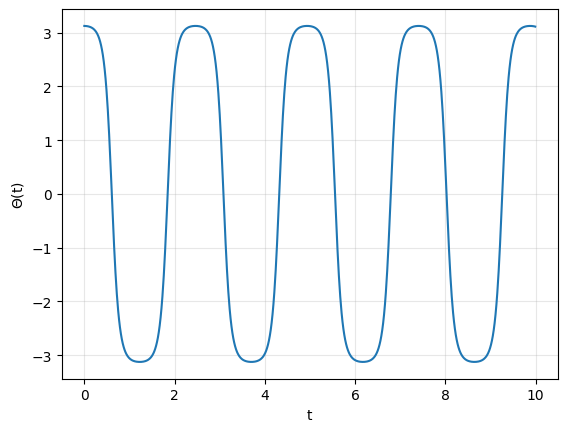

In [ ]:
import matplotlib.pyplot as plt
plt.plot(lista_t,lista_theta)
plt.xlabel('t')
plt.ylabel('$\Theta$(t)')
plt.grid(alpha = 0.3)
plt.show()

In [ ]:
plt.plot